In [1]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from trophics import *
from collections import defaultdict
from taxonomicIndices import *
from foodWebGraphing import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [ ]:
rawEiggData = validatedEiggData()
# rawEiggData = rawEiggData[rawEiggData["Start date year"] > 1960]
rawEiggData.head()

In [ ]:
foodWeb = retrieveCollatedFoodWeb()
len(foodWeb)

In [ ]:
for item in foodWeb:
    item = item.split(" ")
    item = " ".join(item[:2])
    overall.add(item)

for fw in foodWeb:
    v = foodWeb[fw]
    for item in v:
        item = item.split(" ")
        item = " ".join(item[:2])
        overall.add(item)
        
for item in dc:
    overall.add(item)

print(len(overall))

In [ ]:
eiggSpecies = rawEiggData['Scientific name'].str.lower()
eiggSpecies = set(eiggSpecies)

iset = set()
animalsTotal = len(eiggSpecies)
totalFound = 0
for item in eiggSpecies:
    if item in overall:
        iset.add(item)
        totalFound += 1

print(totalFound / animalsTotal)

# Reproduction of manually made network

C:\Users\davie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


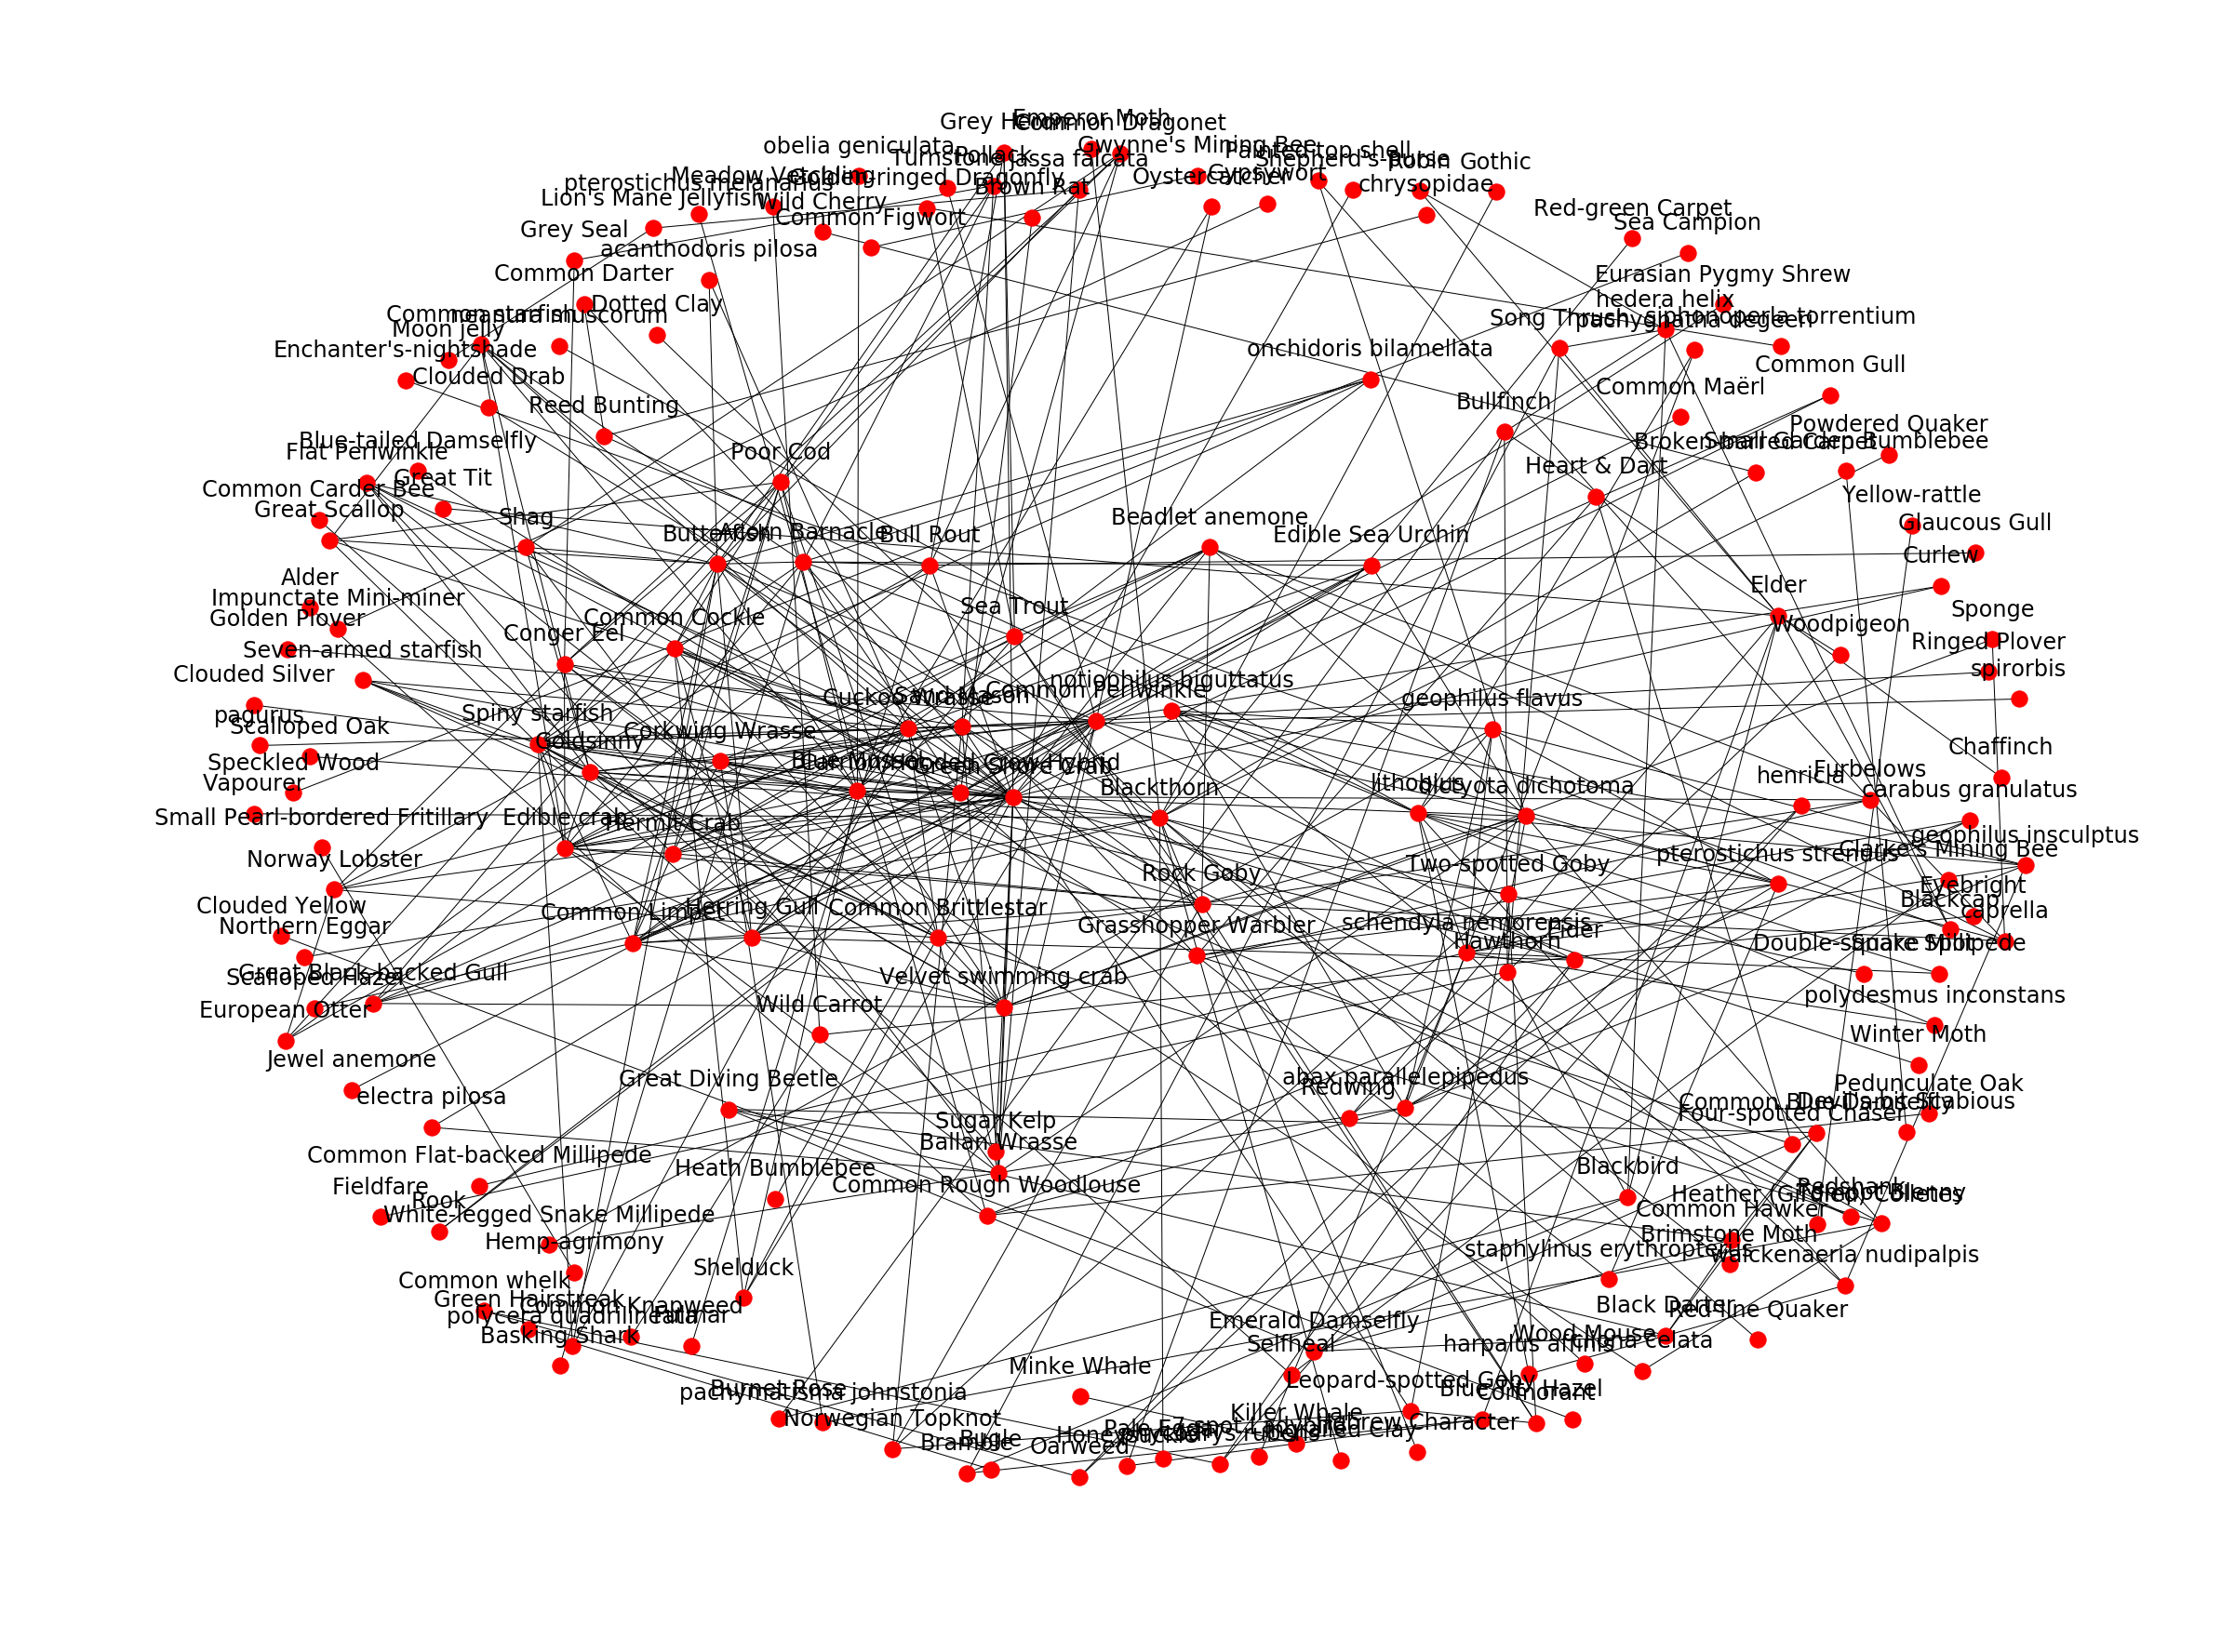

In [7]:
G,mapping = graphFoodWeb(dateRange=(2000,2020))
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)